In [1]:
!pip install tensorflow 
!pip install keras 
!pip install imblearn 
!pip install matplotlib 
!pip install seaborn 
!pip install scikit-learn 
!pip install tensorflow-addons

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [1]:
import numpy as np
import random

#   Plotting
import seaborn as sns
import matplotlib.pyplot as plt


#   DataGenerator to read images and rescale images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
import tensorflow_addons as tfa

#   count each class samples
from collections import Counter

#   callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau

#   evaluate precison recall and f1-score of each class of model
from sklearn.metrics import classification_report
#   Show performance of a classification model
from sklearn.metrics import confusion_matrix

#   Different layers
from keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Softmax

# split dataset to train, validation and test set
from sklearn.model_selection import train_test_split

#   callbacks
from keras import callbacks

#   ADASYN from imblance library
from imblearn.over_sampling import ADASYN

#   Optimizer
from tensorflow.keras.optimizers import RMSprop

from sklearn.metrics import roc_curve, auc
from itertools import cycle

2024-06-06 12:01:50.084856: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-06 12:01:50.331777: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-06 12:01:50.435492: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-06 12:01:51.065103: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvi

In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
## Set Path Here before running the code
WORKING_DIRECTORY = ('archive_3')

##  Name of classes 
CLASSES = ['Bcc',
           'Mel',
           'Nv',
           'vasc',
          'akiec',
          'bkl',
          'df',
          'scc']

IMG_SIZE = 256

In [3]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

X, y = [], []

## Images rescaling
datagen = ImageDataGenerator(rescale=1.0/255.0)

#   Load images by resizing and shuffling randomly
train_dataset = datagen.flow_from_directory(WORKING_DIRECTORY, target_size=(IMG_SIZE, IMG_SIZE),batch_size=5400, shuffle=True)

### Seperate Dataset from  Data Genrator
X, y = train_dataset.next()

Found 25331 images belonging to 8 classes.


In [4]:
samples_before = len(X)
print("Images shape :\t", X.shape)
print("Labels shape :\t", y.shape)

Images shape :	 (5400, 256, 256, 3)
Labels shape :	 (5400, 8)


In [5]:
#   Number of samples in classes 
print("Number of samples in each class:\t", sorted(Counter(np.argmax(y, axis=1)).items()))

#   class labels as per indices
print("Classes Names according to index:\t", train_dataset.class_indices)

Number of samples in each class:	 [(0, 166), (1, 721), (2, 564), (3, 57), (4, 1009), (5, 2687), (6, 145), (7, 51)]
Classes Names according to index:	 {'AK': 0, 'BCC': 1, 'BKL': 2, 'DF': 3, 'MEL': 4, 'NV': 5, 'SCC': 6, 'VASC': 7}


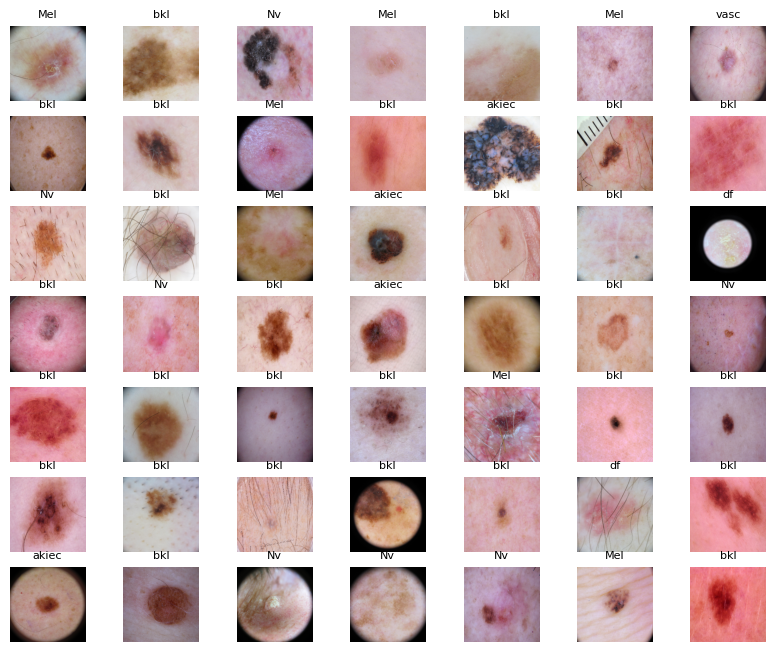

In [6]:
#   show some samples from the dataset randomly
fig = plt.figure(figsize=(10,8))

rows = 7
columns = 7

for i in range(rows * columns):
    fig.add_subplot(rows, columns, i+1)
    num = random.randint(0, len(X)-1 )
    plt.imshow(X[num])
    plt.axis('off')
    plt.title(CLASSES[(np.argmax(y[num]))], fontsize=8)
plt.axis('off')
plt.show()

In [7]:
from collections import Counter
from imblearn.over_sampling import SMOTE

#   reshaping the images to 1D
X = X.reshape(-1, IMG_SIZE * IMG_SIZE * 3)


# Define the desired number of samples for each class
sampling_strategy = {0: 3431,2:3431, 1: 3431, 3: 3431,4:3431,6:3431,7:3431}  # Update with desired numbers

# Apply SMOTE with specified sampling strategy
sm = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X, y = sm.fit_resample(X, y)

#   reshape images to images size of 208, 176, 3
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 3)


# Check the number of samples after SMOTE
print("Number of samples after SMOTE:", sorted(Counter(np.argmax(y, axis=1)).items()))


Number of samples after SMOTE: [(0, 3431), (1, 3431), (2, 3431), (3, 3431), (4, 3431), (5, 2687), (6, 3431), (7, 3431)]


In [8]:
samples_after = len(X)
print("Number of samples after smote :\t", sorted(Counter(np.argmax(y, axis=1)).items()))

Number of samples after smote :	 [(0, 3431), (1, 3431), (2, 3431), (3, 3431), (4, 3431), (5, 2687), (6, 3431), (7, 3431)]


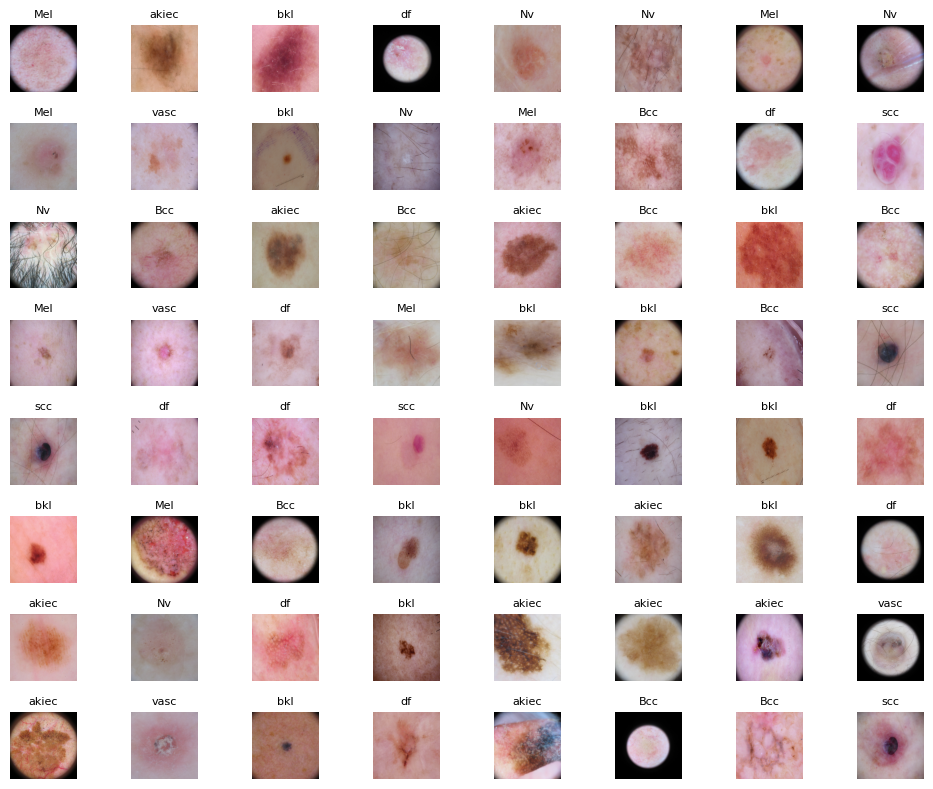

In [10]:
import matplotlib.pyplot as plt
import random

# Assuming you have defined samples_before and samples_after correctly

fig = plt.figure(figsize=(10, 8))

rows = 8
columns = 8

for i in range(rows * columns):
    fig.add_subplot(rows, columns, i + 1)
    num = random.randint(0, samples_after - 1)  # Generate a random index within the range

    # Reshape the flattened image to its original shape before visualization
    img = X[num].reshape(IMG_SIZE, IMG_SIZE, 3)  # Assuming RGB images

    plt.imshow(img)
    plt.axis('off')
    plt.title(CLASSES[np.argmax(y[num])], fontsize=8)

plt.axis('off')
plt.tight_layout()  # Adjusts subplot parameters to give specified padding
plt.show()

In [9]:
#   10% split to validation and 90% split to train set
X_train, x_val, y_train, y_val = train_test_split(X,y, test_size = 0.1)

#   10% split to test from 90% of train and 80% remains in train set
X_train, x_test, y_train, y_test = train_test_split(X_train,y_train, test_size = 0.1)

# Number of samples after train test split
print("Number of samples after splitting into Training, validation & test set\n")

print("Train     \t",sorted(Counter(np.argmax(y_train, axis=1)).items()))
print("Validation\t",sorted(Counter(np.argmax(y_val, axis=1)).items()))
print("Test      \t",sorted(Counter(np.argmax(y_test, axis=1)).items()))

Number of samples after splitting into Training, validation & test set

Train     	 [(0, 2795), (1, 2826), (2, 2729), (3, 2796), (4, 2798), (5, 2170), (6, 2771), (7, 2744)]
Validation	 [(0, 327), (1, 314), (2, 368), (3, 344), (4, 337), (5, 284), (6, 329), (7, 368)]
Test      	 [(0, 309), (1, 291), (2, 334), (3, 291), (4, 296), (5, 233), (6, 331), (7, 319)]


In [15]:
from keras.initializers import LecunUniform
from keras.models import Sequential
from keras.layers import Input, Conv2D, ReLU, MaxPool2D, Dropout, Flatten, Dense, Softmax
import tensorflow as tf

init = LecunUniform()

# Rest of your code remains the same

model = Sequential()

model.add(Input(shape=(IMG_SIZE, IMG_SIZE, 3)))

model.add(Conv2D(8, 3, padding="same", kernel_initializer=init))
model.add(ReLU())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16, 3, padding="same", kernel_initializer=init))
model.add(ReLU())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32, 3, padding="same", kernel_initializer=init))
model.add(ReLU())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, 3, padding="same", kernel_initializer=init))
model.add(ReLU())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128, 3, padding="same", kernel_initializer=init))
model.add(ReLU())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, kernel_initializer=init))
model.add(ReLU())

model.add(Dense(8, kernel_initializer=init))
model.add(Softmax())

# Programmable Gradient Information (PGI) implementation
def pgi(optimizer, loss):
    tf.keras.metrics.CategoricalAccuracy(name='acc'), 
    gradients = optimizer.get_gradients(loss, model.trainable_weights)
    modified_gradients = []
    for grad, var in zip(gradients, model.trainable_weights):
        if isinstance(var, tf.Variable) and 'conv2d' in var.name.lower():
            modified_gradients.append(2 * grad)  # Modify gradients for Conv2D layers
        else:
            modified_gradients.append(grad)
    return modified_gradients
    tf.keras.metrics.CategoricalAccuracy(name='acc')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 re_lu_12 (ReLU)             (None, 256, 256, 8)       0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 re_lu_13 (ReLU)             (None, 128, 128, 16)      0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                 

In [16]:
### Model Compilation
model.compile(
    optimizer = RMSprop(learning_rate=0.0001), 
    loss = tf.keras.losses.CategoricalCrossentropy(name='loss'), 
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(name='acc'), 
        tf.keras.metrics.AUC(name='auc'),
        tfa.metrics.F1Score(num_classes=8),
        tf.metrics.Precision(name="precision"),
        tf.metrics.Recall(name="recall") ])

In [17]:
# callbacks used in model to perform well
rop_callback = ReduceLROnPlateau(monitor="val_loss", patience=10)

CALLBACKS = [rop_callback]

In [18]:
X_train=X_train.reshape(-1,IMG_SIZE,IMG_SIZE,3)
x_val=x_val.reshape(-1,IMG_SIZE,IMG_SIZE,3)


#   declare to run on small gpu create batch sizes of images
valAug = ImageDataGenerator()

#   defining batch size
batch_size = 8

history = model.fit(valAug.flow(X_train, y_train, batch_size=batch_size, shuffle = True),
steps_per_epoch=len(X_train) // batch_size,
validation_data=valAug.flow(x_val, y_val, batch_size=batch_size, shuffle = True),
validation_steps=len(x_test) // batch_size,
epochs= 30,
batch_size=batch_size,
callbacks = CALLBACKS
)

Epoch 1/30


2024-06-06 12:09:08.704672: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8201
2024-06-06 12:09:09.728899: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-06-06 12:09:09.728923: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2024-06-06 12:09:09.729002: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-06-06 12:09:10.576538: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2703/2703 [==============================] - 13s 3ms/step - loss: 1.7548 - acc: 0.3201 - auc: 0.7469 - f1_score: 0.3145 - precision: 0.7142 - recall: 0.0692 - val_loss: 1.5335 - val_acc: 0.4308 - val_auc: 0.8192 - val_f1_score: 0.3850 - val_precision: 0.6977 - val_recall: 0.1875 - lr: 1.0000e-04
Epoch 2/30
2703/2703 [==============================] - 9s 3ms/step - loss: 1.2959 - acc: 0.5261 - auc: 0.8778 - f1_score: 0.5239 - precision: 0.7442 - recall: 0.2729 - val_loss: 1.1883 - val_acc: 0.5575 - val_auc: 0.8969 - val_f1_score: 0.5573 - val_precision: 0.7438 - val_recall: 0.3604 - lr: 1.0000e-04
Epoch 3/30
2703/2703 [==============================] - 9s 3ms/step - loss: 0.9882 - acc: 0.6480 - auc: 0.9303 - f1_score: 0.6427 - precision: 0.7831 - recall: 0.4787 - val_loss: 0.8544 - val_acc: 0.6992 - val_auc: 0.9466 - val_f1_score: 0.6835 - val_precision: 0.8175 - val_recall: 0.5917 - lr: 1.0000e-04
Epoch 4/30
2703/2703 [==============================] - 9s 3ms/step - loss: 0.7640 - acc:

In [20]:
x_test=x_test.reshape(-1,IMG_SIZE,IMG_SIZE,3)


### Evaluate Model
test_scores = model.evaluate(x_test, y_test, batch_size = 8)


print("\n\nTesting Loss : \t\t {0:0.6f}".format(test_scores[0] ))
print("Testing Accuracy : \t {0:0.6f} %".format(test_scores[1] * 100))
print("Testing AC : \t\t {0:0.6f} %".format(test_scores[2] * 100))
print("Testing F1-Score : \t {0:0.6f} %".format(
    ((test_scores[3][0] + test_scores[3][1] + test_scores[3][2] + test_scores[3][3])/4) * 100))
print("Testing Precision : \t {0:0.6f} %".format(test_scores[4] * 100))
print("Testing Recall : \t {0:0.6f} %".format(test_scores[5] * 100))

301/301 [==============================] - 1s 2ms/step - loss: 0.1949 - acc: 0.9626 - auc: 0.9926 - f1_score: 0.9561 - precision: 0.9625 - recall: 0.9621


Testing Loss : 		 0.194891
Testing Accuracy : 	 96.256238 %
Testing AC : 		 99.260914 %
Testing F1-Score : 	 98.672879 %
Testing Precision : 	 96.254683 %
Testing Recall : 	 96.214640 %


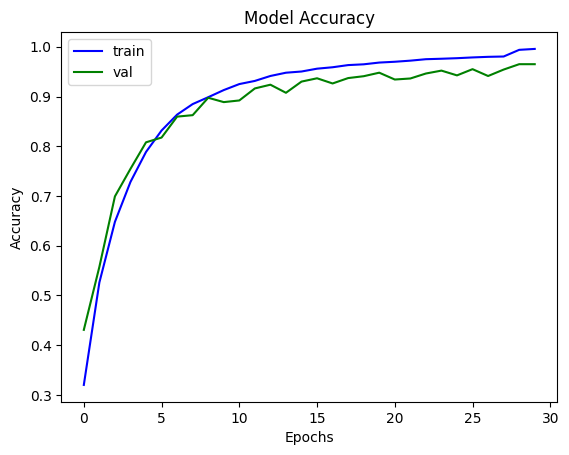

In [21]:
plt.plot(history.history['acc'], 'b')
plt.plot(history.history['val_acc'], 'g')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()

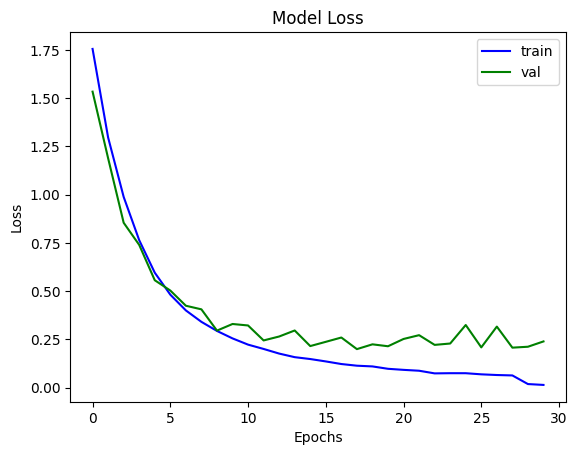

In [22]:
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'g')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "val"])
plt.show()

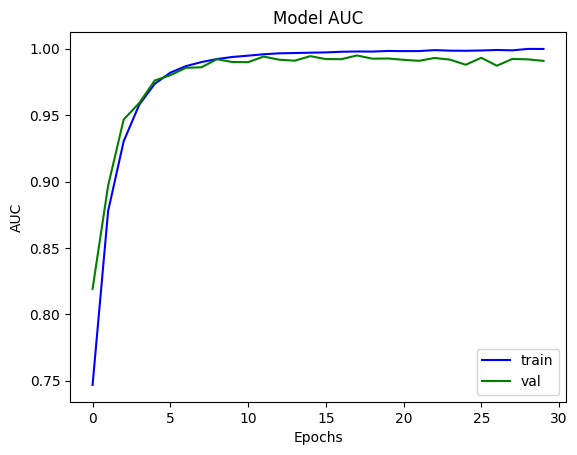

In [23]:
plt.plot(history.history['auc'], 'b')
plt.plot(history.history['val_auc'], 'g')
plt.title("Model AUC")
plt.xlabel("Epochs")
plt.ylabel("AUC")
plt.legend(["train", "val"])
plt.show()

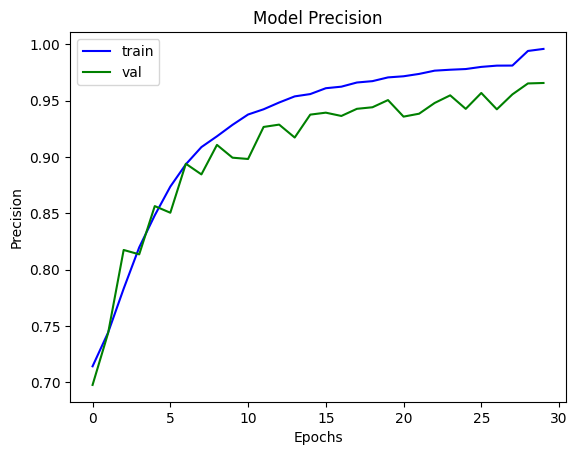

In [24]:
plt.plot(history.history['precision'], 'b')
plt.plot(history.history['val_precision'], 'g')
plt.title("Model Precision")
plt.xlabel("Epochs")
plt.ylabel("Precision")
plt.legend(["train", "val"])
plt.show()

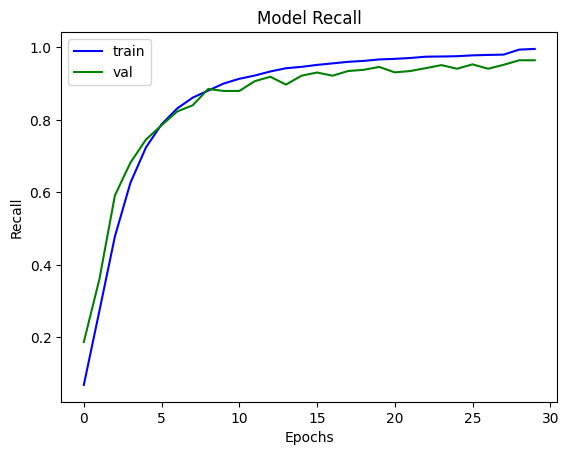

In [25]:
plt.plot(history.history['recall'], 'b')
plt.plot(history.history['val_recall'], 'g')
plt.title("Model Recall")
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.legend(["train", "val"])
plt.show()

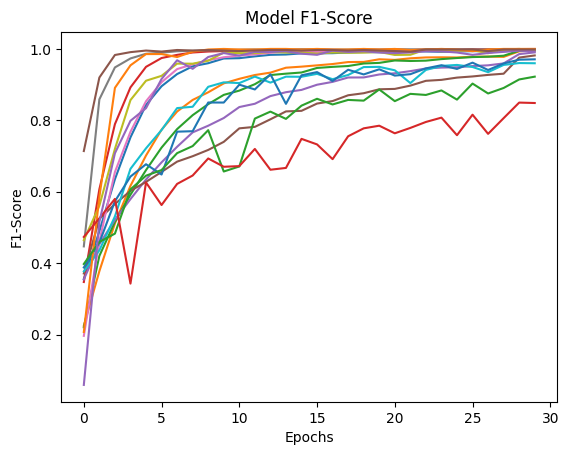

In [26]:
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title("Model F1-Score")
plt.xlabel("Epochs")
plt.ylabel("F1-Score")
plt.show()

In [27]:
pred_labels = model.predict(x_test, batch_size=32)

def roundoff(arr):
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_labels:
    labels = roundoff(labels)

print(classification_report(y_test, pred_labels, target_names=CLASSES))

76/76 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

         Bcc       1.00      1.00      1.00       309
         Mel       0.96      1.00      0.98       291
          Nv       0.95      0.99      0.97       334
        vasc       1.00      1.00      1.00       291
       akiec       0.86      0.93      0.89       296
         bkl       0.93      0.72      0.81       233
          df       0.99      1.00      1.00       331
         scc       0.99      1.00      1.00       319

   micro avg       0.96      0.96      0.96      2404
   macro avg       0.96      0.95      0.96      2404
weighted avg       0.96      0.96      0.96      2404
 samples avg       0.96      0.96      0.96      2404



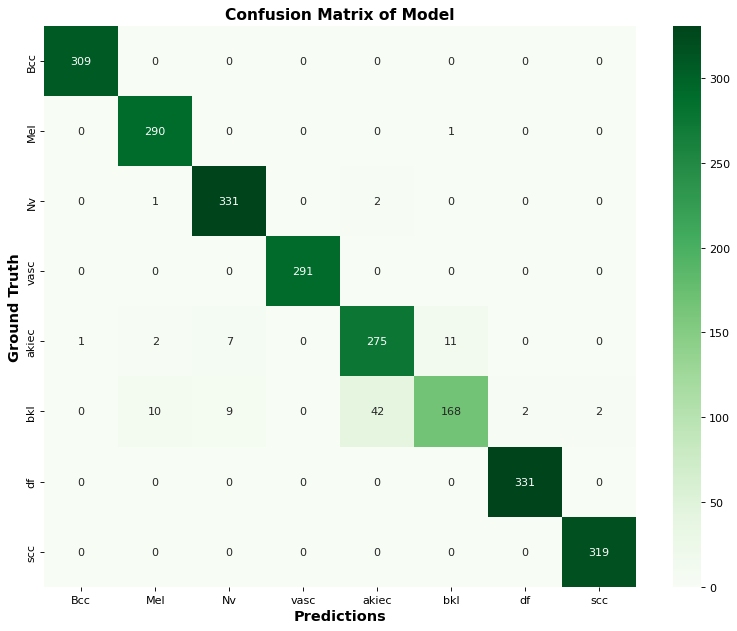

In [28]:
pred_ls = np.argmax(pred_labels, axis=1)
test_ls = np.argmax(y_test, axis=1)

conf_arr = confusion_matrix(test_ls, pred_ls)

plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels= CLASSES, yticklabels=CLASSES)

plt.title('Confusion Matrix of Model', fontweight='bold', fontsize=14.0)
plt.xlabel('Predictions', fontweight='bold', fontsize=13)
plt.ylabel('Ground Truth', fontweight='bold', fontsize=13)
plt.tight_layout()
plt.show(ax)

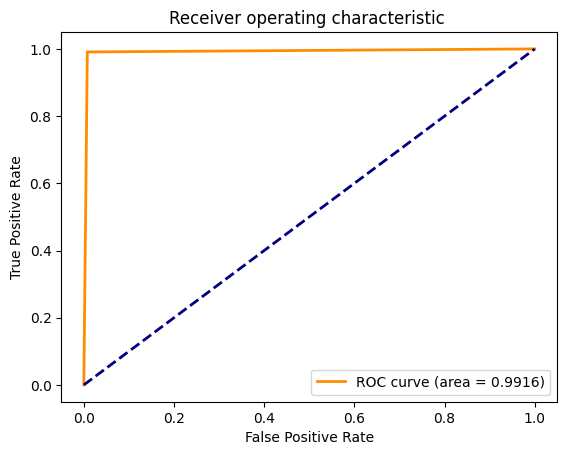

In [32]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred_labels[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred_labels.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.4f)" % roc_auc[2])

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic ")
plt.legend(loc="lower right")
plt.show()

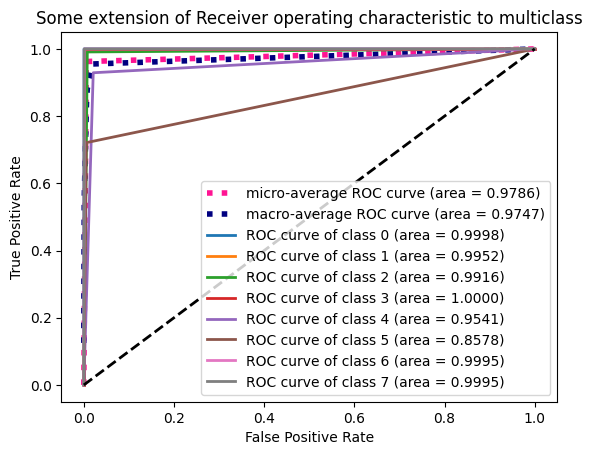

In [33]:
n_classes = 8
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.4f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.4f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [132]:
#    To save the model in the current directory
model.save("Model2.hdf5")